In [1]:
%autosave 7200

Autosaving every 7200 seconds


In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
def r_table(r, num_points=1000):
    """
    Generate a table of N data points with a correlation approximately r
    """
    np.random.seed(8)
    x = np.random.normal(0, 1, num_points)
    z = np.random.normal(0, 1, num_points)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns('x', x, 'y', y)

In [4]:
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)

In [5]:
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)

In [6]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)

In [7]:
def predict_y(x_val):       #Nearest Neighbor
    """
    Predicts y-values for the example table using points within an x-value of 0.25
    """
    nearby_points = example.where('x', are.between(x_val - 0.25, x_val + 0.25))
    return np.mean(nearby_points.column('y'))

In [8]:
example = r_table(0.99)
example

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316
-1.38635,-1.34674
-2.29649,-2.14933
2.40983,2.59627
1.72784,1.76089
2.20456,2.5933
0.794828,0.778249
0.976421,1.18139


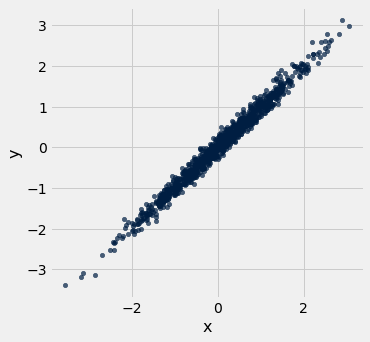

In [9]:
example.scatter('x', 'y')

In [10]:
example = example.with_column(
    'NN Predicted y',
    example.apply(predict_y, 'x'))
example

x,y,NN Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


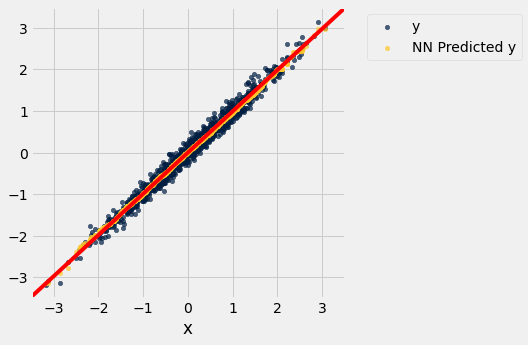

In [11]:
example = example.with_column('NN Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope=0.99)
resize_window()

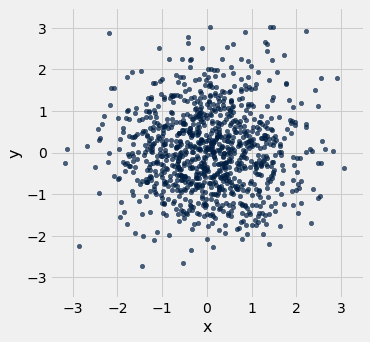

In [12]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

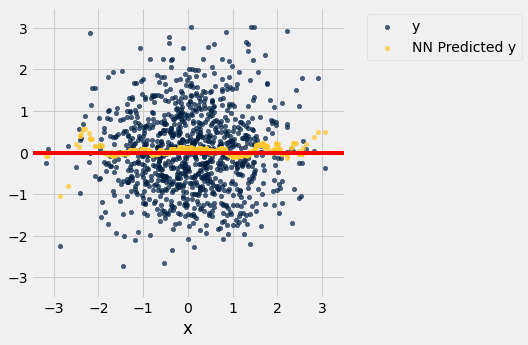

In [13]:
example = example.with_column('NN Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope=0)
resize_window()

In [14]:
example = r_table(0.5)

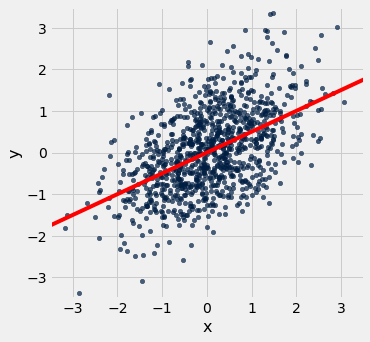

In [15]:
example = example.with_column('NN Predicted y', example.apply(predict_y, 'x'))
example.scatter('x', 'y')
draw_line(slope=.5)
resize_window()

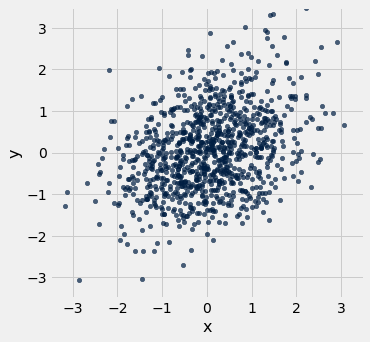

In [16]:
example = r_table(0.33)
example.scatter('x', 'y')
resize_window()

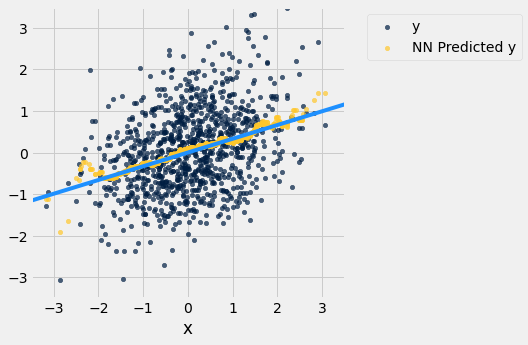

In [17]:
example = example.with_column('NN Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope=0.33, color='dodgerblue')
resize_window()

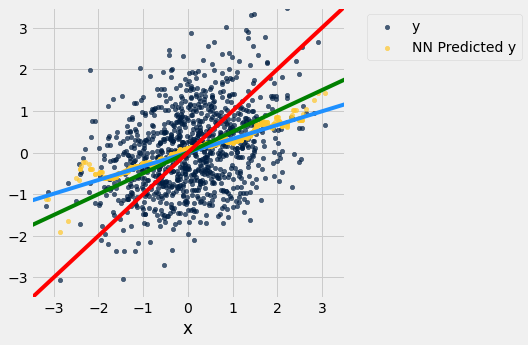

In [18]:
example = example.with_column('NN Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope=0.33, color='dodgerblue')
draw_line(slope=0.5, color='green')
draw_line(slope=1, color='red')
resize_window()

In [19]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

def correlation(tbl, x, y):
    x_standard = standard_units(tbl.column(x))
    y_standard = standard_units(tbl.column(y))
    return np.mean(x_standard * y_standard)

def slope(tbl, x, y):
    r = correlation(tbl, x, y)
    sd_x = np.std(tbl.column(x))
    sd_y = np.std(tbl.column(y))
    return r * sd_y / sd_x

def intercept(tbl, x, y):
    avg_x = np.mean(tbl.column(x))
    avg_y = np.mean(tbl.column(y))
    data_slope = slope(tbl, x, y)
    return avg_y - data_slope * avg_x

In [20]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [21]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.25 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [22]:
heights_with_predictions = heights.with_column(
    'NN prediction', heights.apply(predict_child, 'MidParent'))

In [23]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [24]:
#midparent height is 69.48 and child height is 71.5
#for the 123rd record in dataset.
heights.take(123)

MidParent,Child
69.48,71.5


In [25]:
#regression line estimate for average height of child
#when parent height is 69.48 is 66.92...
galton_slope*69.48 + galton_intercept

66.92007567102915

In [26]:
heights_with_predictions.with_column(
    'Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept)

MidParent,Child,NN prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


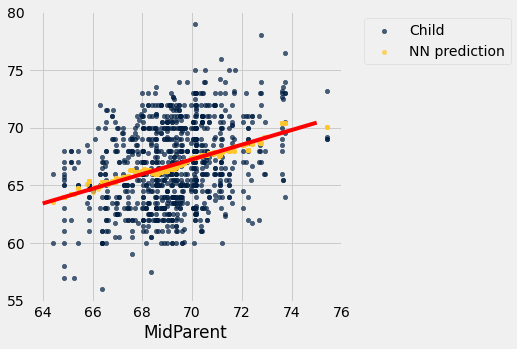

In [27]:
heights_with_predictions.scatter('MidParent')
draw_line(slope=galton_slope, intercept=galton_intercept, x=make_array(64, 75))

In [28]:
demographics = Table.read_table('district_demographics2016.csv').drop('District','Percent voting for Clinton')
demographics

State,Median Income,College%
Alabama,47083,24
Alabama,42035,21.8
Alabama,46544,22.8
Alabama,41110,17
Alabama,51690,30.3
Alabama,61413,36.7
Alabama,34664,19.4
Alaska,76440,29.6
Arizona,50537,24.5
Arizona,49072,34


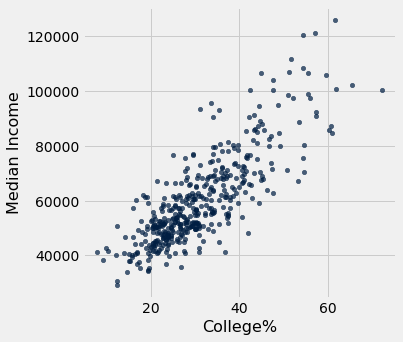

In [29]:
demographics.scatter('College%', 'Median Income')

In [30]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [31]:
demographics_slope = slope(demographics, 'College%', 'Median Income')
demographics_intercept = intercept(demographics, 'College%', 'Median Income')
(demographics_slope, demographics_intercept)

(1270.70168946388, 20802.577766677925)

In [32]:
demographics.where('College%', are.between(58, 60)).where('Median Income', are.between(100000, 120000))

State,Median Income,College%
California,105918,59.5


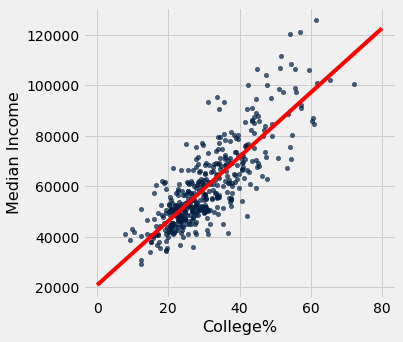

In [33]:
demographics.scatter('College%', 'Median Income')
draw_line(slope=demographics_slope, intercept=demographics_intercept, x=make_array(0, 80))